Import the packages that we will use:
  * `NumPy` and `Pandas` for data management and reading to and from the CSV files
  * `MinMaxScaler` to normalize the different metrics
  * `KMeans` and `DBSCAN` for the clustering
  * `Matplotlib` for plotting

In [78]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN 
import matplotlib.pyplot as plt

%matplotlib inline

# Data Acquisition and Normalization

Import the data from the files. We need to import two files and then merge the dataframes into a single one for the clustering. However, before merging them, we need to normalize the dataframe with the commute times, the housing indexes and the venue count. There is no need to normalize the other dataframe as it is already normalized (the values are percentages)

In [2]:
cthousingvs_features=pd.read_csv('prepared_data/zcta_venuessummary_ct_housing.csv')
cthousingvs_features.set_index('ZCTA5CE10', inplace=True)
cthousingvs_features

,ZCTA5CE10,ct_06:00,ct_06:30,ct_07:00,ct_07:30,ct_08:00,ct_08:30,ct_09:00,ct_09:30,zhvi_sfh,zhvi_mfh,zhvi_1bd,zhvi_2bd,zhvi_3bd,zhvi_4bd,zhvi_5bd,zri_all,venue_count
0,20903,35.9334,43.6932,46.8932,50.1866,49.9400,46.8766,41.2900,36.9100,411485.0,132811.0,97111.0,169494.0,370863.0,443196.0,453451.0,2004.0,18
1,20715,42.4998,48.8400,55.5534,57.2766,57.8668,53.1632,46.0534,41.8268,353359.0,151136.0,184149.0,231795.0,344916.0,357194.0,427007.0,1895.0,2
2,20716,39.6434,47.4834,54.2600,56.0366,56.8734,51.8068,44.6800,40.6600,332640.0,189470.0,138294.0,230586.0,304802.0,364215.0,448082.0,1943.0,1
3,20720,38.2502,46.2368,50.6466,53.3268,54.7566,51.6768,43.6000,39.7900,432368.0,272576.0,398887.0,247074.0,338757.0,463750.0,503876.0,2080.0,2
4,20781,26.2168,32.0234,35.3202,38.0568,39.2702,39.5266,34.7366,30.6000,362782.0,169546.0,128707.0,272726.0,398331.0,390723.0,366905.0,1617.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,20024,6.8034,6.9866,6.9200,7.2734,7.6834,7.8198,8.0866,7.7832,725311.0,448488.0,398143.0,648492.0,765953.0,1016410.0,1093813.0,2425.0,32
98,20001,9.1868,10.0800,10.4634,12.0100,11.9766,12.4466,11.6400,11.2066,859004.0,571394.0,496113.0,690211.0,843278.0,1000819.0,1132617.0,2610.0,31
99,20032,12.2464,14.0400,14.9034,18.8766,19.3468,20.7600,18.6498,15.5734,360497.0,157132.0,181843.0,286805.0,361422.0,381501.0,411846.0,1755.0,5
100,20002,16.1966,18.3000,19.8200,22.7666,22.7468,24.5600,24.6234,22.3664,752335.0,497733.0,429444.0,616577.0,751441.0,853421.0,1028867.0,2325.0,14


In [24]:
scaler = MinMaxScaler()
arraycthousingvsnormalized = scaler.fit_transform(cthousingvs_features)
cthousingvs_featuresnormalized = pd.DataFrame (data=arraycthousingvsnormalized, index=cthousingvs_features.index, columns=cthousingvs_features.columns)

# After scaling, we take the ZCTA5CE10 out of the index and back in a column
cthousingvs_featuresnormalized.reset_index(inplace=True)
cthousingvs_featuresnormalized

,ZCTA5CE10,ct_06:00,ct_06:30,ct_07:00,ct_07:30,ct_08:00,ct_08:30,ct_09:00,ct_09:30,zhvi_sfh,zhvi_mfh,zhvi_1bd,zhvi_2bd,zhvi_3bd,zhvi_4bd,zhvi_5bd,zri_all,venue_count
0,20903,0.800784,0.837907,0.812123,0.855161,0.843110,0.823579,0.800144,0.719935,0.111561,0.039459,0.033380,0.084472,0.090448,0.100380,0.088128,0.327422,0.171717
1,20715,0.949378,0.937898,0.963994,0.977459,0.978727,0.935647,0.894029,0.817666,0.070991,0.054349,0.140391,0.156237,0.071932,0.051713,0.075029,0.253070,0.010101
2,20716,0.884739,0.911542,0.941312,0.956069,0.961731,0.911467,0.866960,0.794473,0.056530,0.085499,0.084013,0.154844,0.043306,0.055686,0.085468,0.285812,0.000000
3,20720,0.853212,0.887323,0.877945,0.909327,0.925516,0.909150,0.845674,0.777181,0.126137,0.153029,0.404405,0.173837,0.067537,0.112011,0.113105,0.379263,0.010101
4,20781,0.580903,0.611190,0.609172,0.645929,0.660565,0.692555,0.670979,0.594512,0.077568,0.069309,0.072226,0.203385,0.110049,0.070686,0.045258,0.063438,0.050505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,20024,0.141588,0.124784,0.111129,0.114936,0.120157,0.127337,0.145717,0.140986,0.330601,0.295971,0.403490,0.636230,0.372387,0.424752,0.405325,0.614598,0.313131
98,20001,0.195523,0.184881,0.173269,0.196639,0.193608,0.209817,0.215754,0.209033,0.423915,0.395841,0.523941,0.684286,0.427566,0.415930,0.424547,0.740791,0.303030
99,20032,0.264760,0.261815,0.251131,0.315084,0.319702,0.358015,0.353914,0.295831,0.075973,0.059221,0.137556,0.219603,0.083710,0.065468,0.067519,0.157572,0.040404
100,20002,0.354151,0.344577,0.337352,0.382183,0.377872,0.425755,0.471652,0.430854,0.349463,0.335986,0.441974,0.599467,0.362031,0.332519,0.373155,0.546385,0.131313


We can now load the venues detailed dataframe and merger the dataframes.

In [25]:
venuesdetailed_features=pd.read_csv('prepared_data/zcta_venues.csv')
venuesdetailed_features

,ZCTA5CE10,Accessories Store,African Restaurant,American Restaurant,Amphitheater,Antique Shop,Arcade,Arepa Restaurant,Art Gallery,Art Museum,...,Warehouse Store,Watch Shop,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Xinjiang Restaurant,Yoga Studio
0,20001,0.0,0.0,0.000000,0.0,0.0,0.00,0.00,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.032258,0.032258,0.000000,0.0,0.0,0.00
1,20002,0.0,0.0,0.071429,0.0,0.0,0.00,0.00,0.142857,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00
2,20003,0.0,0.0,0.016393,0.0,0.0,0.00,0.00,0.032787,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.016393,0.000000,0.0,0.0,0.00
3,20005,0.0,0.0,0.040000,0.0,0.0,0.01,0.01,0.010000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00
4,20007,0.0,0.0,0.000000,0.0,0.0,0.00,0.00,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,22310,0.0,0.0,0.000000,0.0,0.0,0.00,0.00,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00
98,22311,0.0,0.0,0.153846,0.0,0.0,0.00,0.00,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00
99,22312,0.0,0.0,0.000000,0.0,0.0,0.00,0.00,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.50
100,22314,0.0,0.0,0.013889,0.0,0.0,0.00,0.00,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.013889,0.000000,0.013889,0.0,0.0,0.00


In [27]:
allfeaturesraw=pd.merge(cthousingvs_featuresnormalized, venuesdetailed_features, how="inner").copy()
allfeaturesraw.set_index('ZCTA5CE10', inplace=True)
allfeaturesraw

,ct_06:00,ct_06:30,ct_07:00,ct_07:30,ct_08:00,ct_08:30,ct_09:00,ct_09:30,zhvi_sfh,zhvi_mfh,...,Warehouse Store,Watch Shop,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Xinjiang Restaurant,Yoga Studio
ZCTA5CE10,,,,,,,,,,,,,,,,,,,,,
20903,0.800784,0.837907,0.812123,0.855161,0.843110,0.823579,0.800144,0.719935,0.111561,0.039459,...,0.0,0.0,0.0,0.0,0.000000,0.055556,0.0,0.0,0.0,0.0
20715,0.949378,0.937898,0.963994,0.977459,0.978727,0.935647,0.894029,0.817666,0.070991,0.054349,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.5,0.0,0.0
20716,0.884739,0.911542,0.941312,0.956069,0.961731,0.911467,0.866960,0.794473,0.056530,0.085499,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
20720,0.853212,0.887323,0.877945,0.909327,0.925516,0.909150,0.845674,0.777181,0.126137,0.153029,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
20781,0.580903,0.611190,0.609172,0.645929,0.660565,0.692555,0.670979,0.594512,0.077568,0.069309,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20024,0.141588,0.124784,0.111129,0.114936,0.120157,0.127337,0.145717,0.140986,0.330601,0.295971,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
20001,0.195523,0.184881,0.173269,0.196639,0.193608,0.209817,0.215754,0.209033,0.423915,0.395841,...,0.0,0.0,0.0,0.0,0.032258,0.032258,0.0,0.0,0.0,0.0
20032,0.264760,0.261815,0.251131,0.315084,0.319702,0.358015,0.353914,0.295831,0.075973,0.059221,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


Now we can normalize the features with the MinMaxScaler

# K-Means Clustering

The first step of the K-Means classification is to determine how many clusters will we use. To do this, we will compute the inertia of K-Means when adding more clusters, trying to identify the "elbow" of the curve.

In [45]:
maxclusters=60

Sum_of_squared_distances = []
K = range(1,maxclusters)
for k in K:
    km = KMeans(init = "k-means++", n_clusters = k, n_init = 12)
    km = km.fit(allfeaturesraw)
    Sum_of_squared_distances.append(km.inertia_)

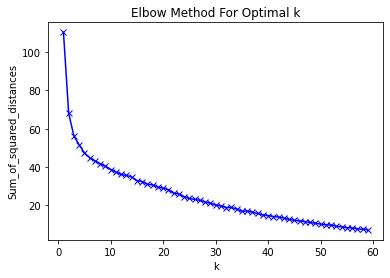

In [46]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

As we can see, in this curve there is not a clear "elbow", although the point of diminishing returns (where adding more clusters only improves the results minimally) seems to be around 6. However, as the metric keeps going down after, we will make two evaluations, one with 6 clusters and one with 30 clusters.

In [103]:
km6 = KMeans(init = "k-means++", n_clusters = 6, n_init = 12)
km30 = KMeans(init = "k-means++", n_clusters = 30, n_init = 12)

km6 = km6.fit(allfeaturesraw)
km30 = km30.fit(allfeaturesraw)

kmeansresults = pd.DataFrame(data=km6.labels_, index=allfeaturesraw.index, columns={"Kmeans 6 Clusters"})
kmeansresults['Kmeans 30 Clusters'] = km30.labels_

Count how many areas are in the same cluster as the National Landing

In [104]:
kmeansresults.loc[22202, :]

Kmeans 6 Clusters      1
Kmeans 30 Clusters    12
Name: 22202, dtype: int32

In [105]:
kmeansresults.groupby('Kmeans 6 Clusters').count()

,Kmeans 30 Clusters
Kmeans 6 Clusters,
0,21
1,17
2,25
3,17
4,20
5,2


In [106]:
kmeansresults.groupby('Kmeans 30 Clusters').count()

,Kmeans 6 Clusters
Kmeans 30 Clusters,
0,1
1,14
2,7
3,3
4,9
5,7
6,2
7,1
8,4


In [107]:
kmeansresults.reset_index(inplace=True)
kmeansresults

,ZCTA5CE10,Kmeans 6 Clusters,Kmeans 30 Clusters
0,20903,0,10
1,20715,0,10
2,20716,0,23
3,20720,0,4
4,20781,3,2
...,...,...,...
97,20024,1,12
98,20001,1,12
99,20032,4,19
100,20002,4,1


# DBSCAN Clustering

First we need to test how the variation of epsilon and the number of samples in a "dense" area affect the resutls

In [92]:
step=0.05
myeps=0

numclusters = []
numoutliers = []
epsilons = []
while myeps < 1:
    myeps += step
    epsilons.append(myeps)
    db = DBSCAN(eps=myeps, min_samples=5).fit(allfeaturesraw)
    tmp = np.unique(db.labels_, return_counts=True)
    numclusters.append(np.count_nonzero (tmp[0] >= 0))
    numoutliers.append(tmp[1][0])

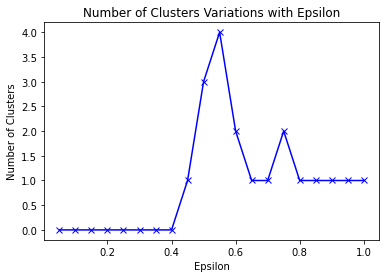

In [94]:
plt.plot(epsilons, numclusters, 'bx-')
plt.xlabel('Epsilon')
plt.ylabel('Number of Clusters')
plt.title('Number of Clusters Variations with Epsilon')
plt.show()

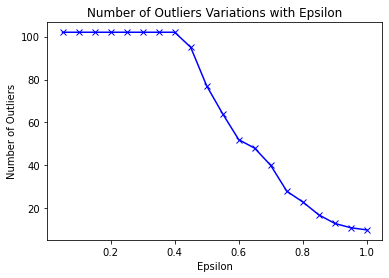

In [96]:
plt.plot(epsilons, numoutliers, 'bx-')
plt.xlabel('Epsilon')
plt.ylabel('Number of Outliers')
plt.title('Number of Outliers Variations with Epsilon')
plt.show()

In [97]:
numclusters = []
numoutliers = []
samples = range(1,50)
for s in samples:
    db = DBSCAN(eps=0.5, min_samples=s).fit(allfeaturesraw)
    tmp = np.unique(db.labels_, return_counts=True)
    numclusters.append(np.count_nonzero (tmp[0] >= 0))
    numoutliers.append(tmp[1][0])

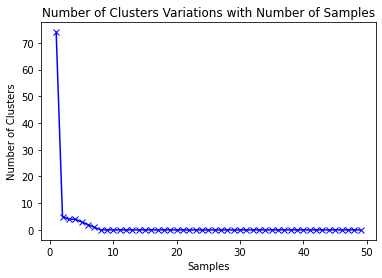

In [98]:
plt.plot(samples, numclusters, 'bx-')
plt.xlabel('Samples')
plt.ylabel('Number of Clusters')
plt.title('Number of Clusters Variations with Number of Samples')
plt.show()

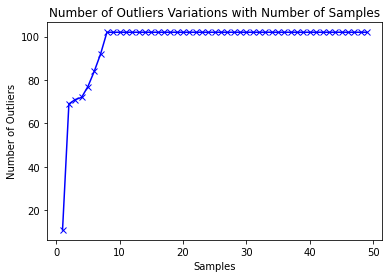

In [99]:
plt.plot(samples, numoutliers, 'bx-')
plt.xlabel('Samples')
plt.ylabel('Number of Outliers')
plt.title('Number of Outliers Variations with Number of Samples')
plt.show()

Based on the previous results we choose an epsilon of 0.5 and at least 2 samples in a cluster

In [171]:
db = DBSCAN(eps=0.5, min_samples=2).fit(allfeaturesraw)
tmp = np.unique(db.labels_, return_counts=True)
tmp

(array([-1,  0,  1,  2,  3,  4]), array([69, 11, 10,  4,  6,  2]))

In [172]:
dbscanresults = pd.DataFrame(data=db.labels_, index=allfeaturesraw.index, columns={"DBSCAN Clusters"})
dbscanresults

,DBSCAN Clusters
ZCTA5CE10,
20903,0
20715,-1
20716,-1
20720,-1
20781,-1
...,...
20024,3
20001,3
20032,-1


In [173]:
dbscanresults.reset_index(inplace=True)
dbscanresults

,ZCTA5CE10,DBSCAN Clusters
0,20903,0
1,20715,-1
2,20716,-1
3,20720,-1
4,20781,-1
...,...,...
97,20024,3
98,20001,3
99,20032,-1
100,20002,1


In [174]:
dbscanresults.groupby('DBSCAN Clusters').count()

,ZCTA5CE10
DBSCAN Clusters,
-1,69
0,11
1,10
2,4
3,6
4,2


# Final Processing

As a final step, we merge the dataframes with all the clustering results in a single dataframe, for easy export to a single CSV file

In [114]:
clusteringresults_final=pd.merge(kmeansresults, dbscanresults, how="inner")
clusteringresults_final

,ZCTA5CE10,Kmeans 6 Clusters,Kmeans 30 Clusters,DBSCAN Clusters
0,20903,0,10,0
1,20715,0,10,-1
2,20716,0,23,-1
3,20720,0,4,-1
4,20781,3,2,-1
...,...,...,...,...
97,20024,1,12,3
98,20001,1,12,3
99,20032,4,19,-1
100,20002,4,1,1


In [115]:
clusteringresults_final.to_csv('analysis_results/clusteringresults.csv', index=False)